<h1><center>NYC Airbnb - Machine Learning Based Predictive Analysis</h1></center>

In [1]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [3]:
# Load Dataset

data = pd.read_csv("train.csv")
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [4]:
# Explore columns

data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [5]:
# Description

data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [6]:
# Exploring datatypes
data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

### Visualizing data

Text(0.5, 1.0, 'Region Based on Latitude and Longitude')

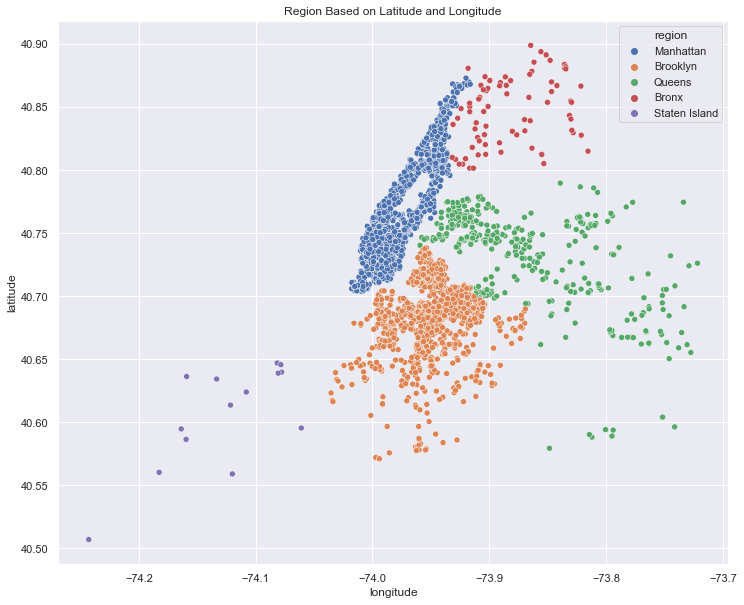

In [7]:
# Visualizing region based on latitude and longitude

sns.set(rc = {"figure.figsize": (12, 10)})
ax = sns.scatterplot(data = data, x = "longitude", y = "latitude",hue = 'region')
ax.set_title('Region Based on Latitude and Longitude')

Text(0.5, 1.0, 'Type of Accommodation')

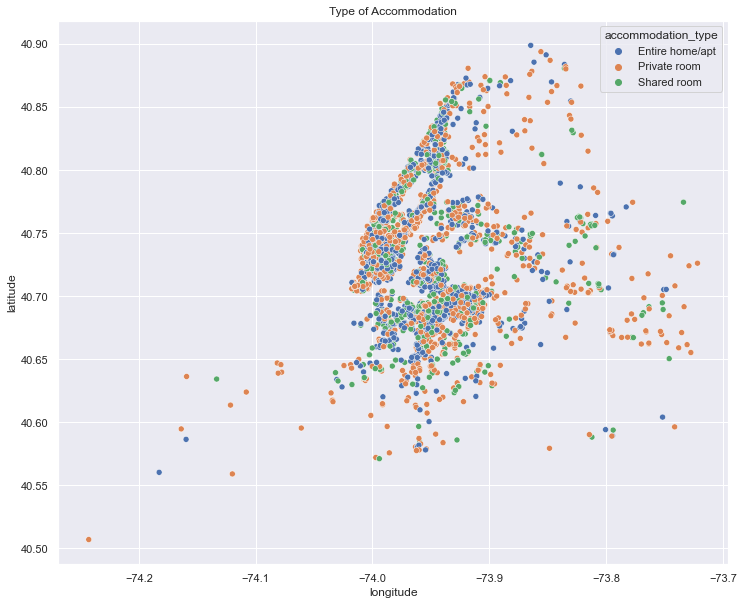

In [8]:
# Visualizing data based on accomodation type

sns.set(rc = {"figure.figsize": (12, 10)})
ax = sns.scatterplot(x = data.longitude, y = data.latitude,hue = data.accommodation_type)
ax.set_title('Type of Accommodation')

### Finding the number of Null and duplicate values

In [9]:
# Finding the number of Null values if any

data.isna().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

In [10]:
# Finding the number of duplicate values if any

data.duplicated().sum()

0

#### Dealing with Null values

In [11]:
# Putting reviews_per_month to zero for hotels having number_of_reviews as zero

data.loc[data.number_of_reviews==0, 'reviews_per_month'] = 0
data.isna().sum()

id                     0
region                 0
latitude               0
longitude              0
accommodation_type     0
cost                   0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
owner_id               0
owned_hotels           0
yearly_availability    0
dtype: int64

### Outlier Detection

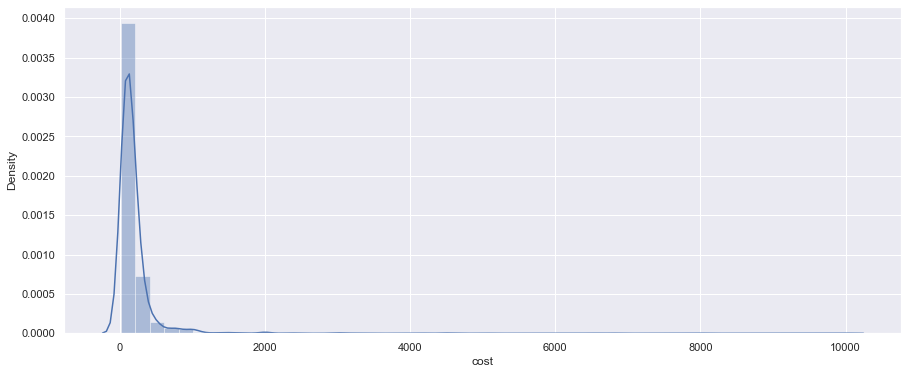

In [12]:
# Analyzing cost

f,ax = plt.subplots(figsize = (15,6))
sns.distplot(data.cost);

<AxesSubplot:xlabel='cost'>

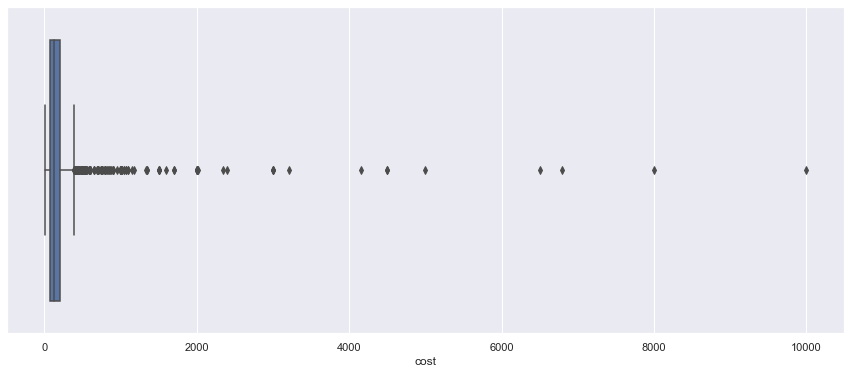

In [13]:
# Analyzing outliers for cost

f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(data.cost)

In [14]:
# Calculating mean of cost

np.mean(data.cost)

195.9432055749129

In [15]:
# Calculating number of records having cost value greater than 2000

len(data[data.cost > 2000])

15

<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

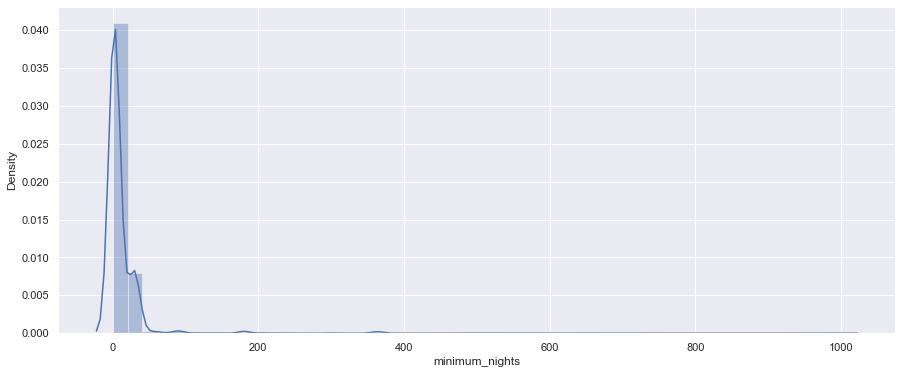

In [16]:
# Analyzing minimum_nights

f,ax = plt.subplots(figsize = (15,6))
sns.distplot(data.minimum_nights)

<AxesSubplot:xlabel='minimum_nights'>

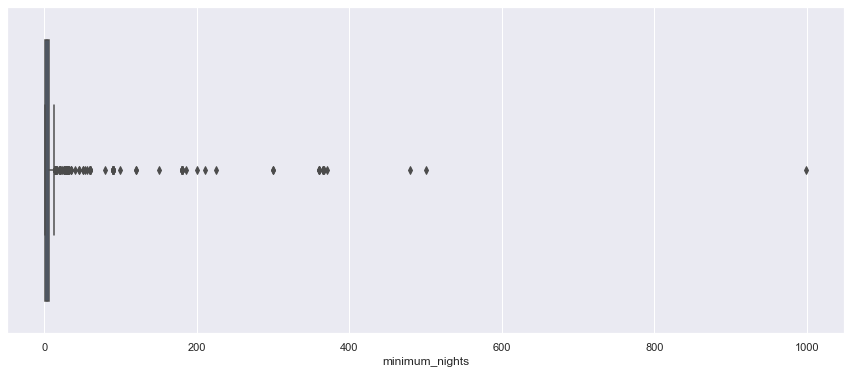

In [17]:
# Analyzing outliers for minimum_nights

f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(data.minimum_nights)

In [18]:
# Calculating mean for minimum_nights

np.mean(data.minimum_nights)

11.530313588850174

In [19]:
# Calculating number of records having minimum_nights value greater than 200

len(data[data.minimum_nights > 200])

19

### Dealing with outliers (Quartile analysis)

In [20]:
# Creating a function to return high and low quartile ranges

def outlier(df):
    
    sorted(df)
    Q1, Q3 = np.percentile(df , [25,75])
    high = Q3 + (1.5 * (Q3 - Q1))
    low = Q1 - (1.5 * (Q3 - Q1))

    return low, high

#### Deleting outliers for Cost

In [21]:
# Calculating low and high quartiles for cost

low, high = outlier(data.cost)
low, high

(-112.5, 387.5)

In [22]:
# Removing data with values out of cost inter-quartile range

data = data[(data.cost > low) & (data.cost < high)]

<AxesSubplot:xlabel='cost', ylabel='Density'>

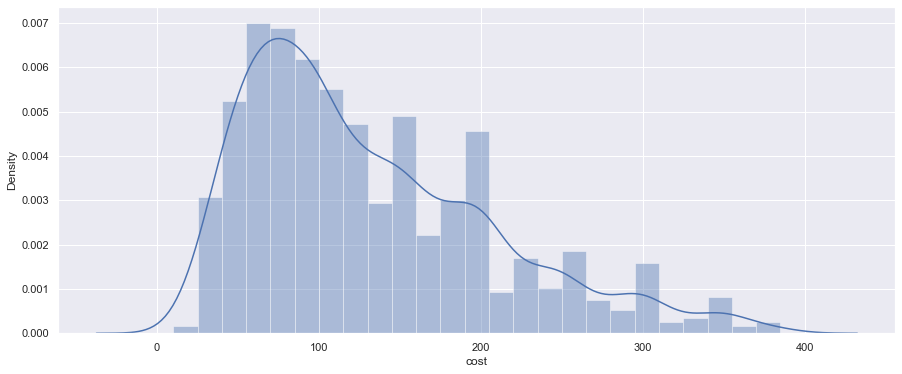

In [23]:
# Visualizing cost distribution

f,ax = plt.subplots(figsize = (15,6))
sns.distplot(data.cost)

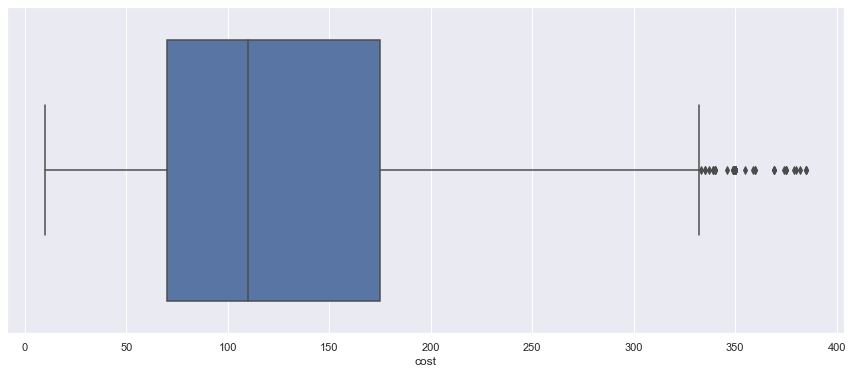

In [24]:
# Visualizing cost distribution using boxplot

f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(data.cost);

#### Deleting outliers for minimum nights

In [25]:
# Calculating low and high quartiles for minimum_nights

low, high = outlier(data.minimum_nights)
low, high

(-4.0, 12.0)

In [26]:
# Removing data with values out of minimum_nights inter-quartile range

data = data[(data.minimum_nights > low) & (data.minimum_nights < high)]

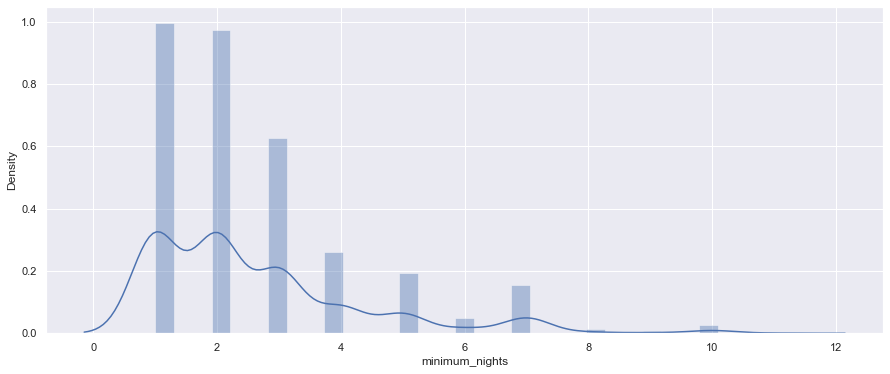

In [27]:
# Visualizing minimum_nights distribution

f,ax = plt.subplots(figsize = (15,6))
sns.distplot(data.minimum_nights);

<AxesSubplot:xlabel='minimum_nights'>

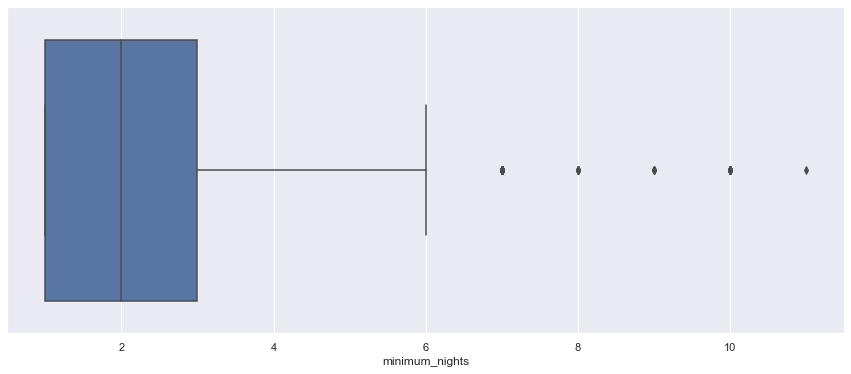

In [28]:
# Visualizing minimum_nights distribution using boxplot

f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(data.minimum_nights)

### Label Encoding of Categorical Variables

In [29]:
# Encoding region and accomodation_type feature

data['region'] = LabelEncoder().fit_transform(data['region'])

data['accommodation_type'] = LabelEncoder().fit_transform(data['accommodation_type'])

data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,2,40.71854,-74.00439,0,170,5,7,0.56,929983,1,0
1,246,1,40.64446,-73.95030,0,65,3,238,2.30,281764,1,0
2,19091,3,40.78573,-73.81062,1,85,1,0,0.00,19923341,1,1
4,444,2,40.82426,-73.94630,2,75,3,38,0.42,745069,3,1
5,30553,2,40.73976,-74.00953,1,200,10,11,0.76,11243113,1,1


### Scaling of data

In [30]:
# Scaling data using standard scaler

standardScaler = StandardScaler()

features = ['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
data[features] = standardScaler.fit_transform(data[features])

data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,2,-0.195181,-1.156567,0,0.600120,1.339340,-0.361189,-0.393411,929983,1,0
1,246,1,-1.475685,-0.103848,0,-0.832350,0.213526,6.103848,0.866151,281764,1,0
2,19091,3,0.966226,2.614652,1,-0.559498,-0.912289,-0.557099,-0.798787,19923341,1,1
4,444,2,1.632233,-0.025999,2,-0.695924,0.213526,0.506413,-0.494755,745069,3,1
5,30553,2,0.171615,-1.256603,1,1.009397,4.153875,-0.249240,-0.248633,11243113,1,1


## Machine Learning Model

**Building a ML model that categorizes hotels on the basis of their yearly availability.**<br>
Identifying most important features that can influence the target variable and visualizing them.

In [31]:
# Splitting data to X_train and Y_train

X_train = data[data.columns[:11]]
Y_train = data[data.columns[11:12]]

print(X_train.shape, Y_train.shape)

(2138, 11) (2138, 1)


### Decision Tree Classifier

In [32]:
# Using decision tree classifier

DTreeC = DecisionTreeClassifier(min_samples_leaf = .0001)
DTreeC.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_leaf=0.0001)

In [33]:
# Evaluation using cross validation

scores = cross_val_score(DTreeC, X_train, Y_train, cv = 10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.02


In [34]:
# Most important features for the model

importances = DTreeC.feature_importances_
importances

array([0.02923666, 0.00905582, 0.03740624, 0.05750809, 0.51426541,
       0.03575262, 0.01471711, 0.01807595, 0.0441523 , 0.03389669,
       0.20593312])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'region'),
  Text(2, 0, 'latitude'),
  Text(3, 0, 'longitude'),
  Text(4, 0, 'accommodation_type'),
  Text(5, 0, 'cost'),
  Text(6, 0, 'minimum_nights'),
  Text(7, 0, 'number_of_reviews'),
  Text(8, 0, 'reviews_per_month'),
  Text(9, 0, 'owner_id'),
  Text(10, 0, 'owned_hotels')])

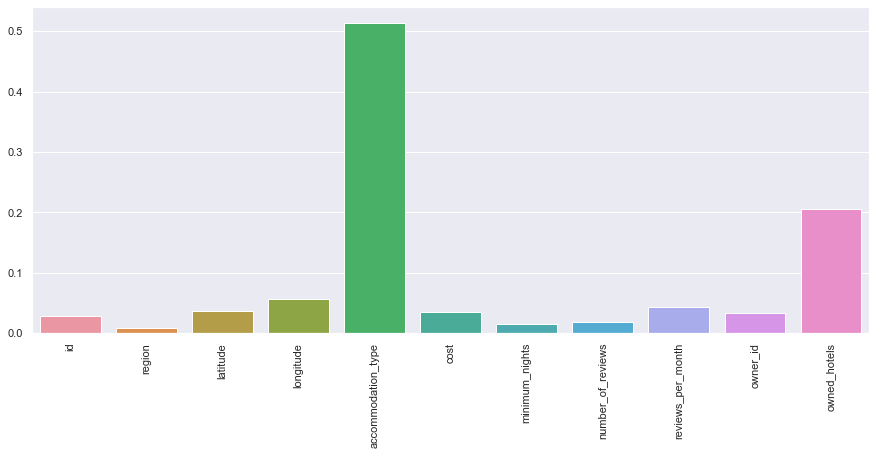

In [35]:
# Visualizing most important features for the model

f,ax = plt.subplots(figsize = (15,6))
sns.barplot(x = X_train.columns, y = importances, ax = ax)
plt.xticks(rotation = 90)

### Generating Predictions

Below code can be used to generate predictions using the trained model on an unknown dataset by name "test.csv".

In [36]:
'''
test_data = pd.read_csv("train.csv")

results_df = pd.DataFrame()
results_df['id'] = test_data['id']
results_df['yearly_availability'] = DecisionTreeClassifier.predict(DTreeC, X = test_data, check_input = True)

results_df.to_csv('Results.csv', index = False)
'''

'\ntest_data = pd.read_csv("train.csv")\n\nresults_df = pd.DataFrame()\nresults_df[\'id\'] = test_data[\'id\']\nresults_df[\'yearly_availability\'] = DecisionTreeClassifier.predict(DTreeC, X = test_data, check_input = True)\n\nresults_df.to_csv(\'Results.csv\', index = False)\n'